In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
from netCDF4 import Dataset


import iris
import iris.plot as iplt
from iris.coords import DimCoord
from iris.cube import Cube
import iris.quickplot as qplt
import matplotlib.colors as colors
from sklearn import datasets
import iris.analysis
import numpy.ma as ma

import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point


import matplotlib.cm as mpl_cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.pyplot import xcorr


from scipy.interpolate import splrep, splev
from scipy.stats import pearsonr
from scipy import signal 

import math
from matplotlib import mlab

import regionmask

import warnings
warnings.filterwarnings("ignore")

In [3]:
# load lig amoc-pr regression coef

# 8 models in total

cube_access_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/ACCESS-ESM1-5_lig127k.cvdp_data.901-1100.nc', 'amoc_pr_regression_ann')

cube_cesm_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/CESM2_lig127k.cvdp_data.1-700.nc', 'amoc_pr_regression_ann')

cube_fgoalsf3_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc', 'amoc_pr_regression_ann') 

cube_fgoalsg3_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-g3_lig127k.cvdp_data.750-1249.nc', 'amoc_pr_regression_ann') 

cube_giss_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc', 'amoc_pr_regression_ann')


# hadgem has no name for the coordinates 
cube_hadgem_amoc_pr_1 = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/HadGEM3-GC31-LL_lig127k.cvdp_data.1950-2049.nc', 'amoc_pr_regression_ann') 


cube_ipsl_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc', 'amoc_pr_regression_ann') 

cube_noresm2_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/NorESM2-LM_lig127k.cvdp_data.2101-2200.nc', 'amoc_pr_regression_ann')

In [3]:
print(cube_hadgem_amoc_pr_1)

precipitation_flux / (mm/day/Sv)    (-- : 144; -- : 192)
     Auxiliary coordinates:
          latitude                      x         -
          longitude                     -         x
     Attributes:
          Conventions: CF-1.6
          NCO: 4.4.4
          comment: includes both liquid and solid phases
          history: Wed Oct 13 13:30:46 2021: ncks -O /home/p2f-v/public_html/CVDP/zhiyi_AMOC/HadGEM3-GC31-LL_lig127k.cvdp_data.1950-2049.nc...
          notes: Data from HadGEM3-GC31-LL_lig127k from 1950-2049
          original_name: mo: (stash: m01s05i216, lbproc: 128)
          source: NCAR Climate Analysis Section's Climate Variability Diagnostics Package...


In [4]:
pi_cube_hadgem_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc', 'amoc_pr_regression_ann') 

In [5]:
cube_hadgem_amoc_pr = pi_cube_hadgem_amoc_pr.copy(data=cube_hadgem_amoc_pr_1.data)
print(cube_hadgem_amoc_pr)

precipitation_flux / (mm/day/Sv)    (latitude: 144; longitude: 192)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Attributes:
        Conventions                 'CF-1.6'
        NCO                         '4.4.4'
        comment                     'includes both liquid and solid phases'
        history                     '2019-06-20T13:03:20Z altered by CMOR: replaced missing value flag (-1.07374e+09)...
        notes                       'Data from HadGEM3-GC31-LL_piControl from 2250-2349'
        original_name               'mo: (stash: m01s05i216, lbproc: 128)'
        source                      "NCAR Climate Analysis Section's Climate Variability Diagnostics Package...


In [6]:
# regridding

amoc_pr_cube=[cube_access_amoc_pr, cube_cesm_amoc_pr,  cube_fgoalsf3_amoc_pr, cube_fgoalsg3_amoc_pr, 
              cube_giss_amoc_pr, cube_hadgem_amoc_pr, cube_ipsl_amoc_pr,  cube_noresm2_amoc_pr]

In [7]:
pmip4_modelname=['access','cesm','fgoalsf3','fgoalsg3','giss','hadgem','ipsl','noresm2']

In [8]:
sample_points_1 = [('latitude', np.linspace(-90,90,180)),
                   ('longitude',  np.linspace(0,360,360))]

In [9]:
for n in range (0, len(pmip4_modelname)):  
    globals()[pmip4_modelname[n]+'_amoc_pr_regrid'] = amoc_pr_cube[n].interpolate(sample_points_1, iris.analysis.Linear())

In [10]:
# load pi amoc-pr regression coef

pi_cube_access_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/ACCESS-ESM1-5_piControl.cvdp_data.501-600.nc', 'amoc_pr_regression_ann')

pi_cube_cesm_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/CESM2_piControl.cvdp_data.701-1200.nc', 'amoc_pr_regression_ann')

pi_cube_fgoalsf3_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-f3-L_historical.cvdp_data.1850-1900.nc', 'amoc_pr_regression_ann') 

pi_cube_fgoalsg3_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-g3_piControl.cvdp_data.200-699.nc', 'amoc_pr_regression_ann') 

pi_cube_giss_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc', 'amoc_pr_regression_ann')

pi_cube_hadgem_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc', 'amoc_pr_regression_ann') 

pi_cube_ipsl_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc', 'amoc_pr_regression_ann') 

pi_cube_noresm2_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/NorESM2-LM_piControl.cvdp_data.1710-2100.nc', 'amoc_pr_regression_ann')

In [11]:
# regridding

pi_amoc_pr_cube=[pi_cube_access_amoc_pr, pi_cube_cesm_amoc_pr, pi_cube_fgoalsf3_amoc_pr, pi_cube_fgoalsg3_amoc_pr, 
                 pi_cube_giss_amoc_pr, pi_cube_hadgem_amoc_pr, pi_cube_ipsl_amoc_pr, pi_cube_noresm2_amoc_pr]

In [12]:
for n in range (0, len(pmip4_modelname)):  
    globals()['pi_'+ pmip4_modelname[n]+'_amoc_pr_regrid'] = pi_amoc_pr_cube[n].interpolate(sample_points_1, iris.analysis.Linear())

In [13]:
max_amoc_30_diff=[3.007097, 0.813997, 1.262486, 0.581753, 0.640879, 1.122476, -1.841937, 0.386061]
# acc, cesm, fgoalsf3, fgoalsg3, giss, hadgem, ipsl, noresm2

In [15]:
#delta PR(amoc30n)

for j in range (0, len(pmip4_modelname)):  
    globals()[pmip4_modelname[j]+'_pr_change_caused_by_amoc']=max_amoc_30_diff[j]*(globals()[pmip4_modelname[j]+'_amoc_pr_regrid'] + globals()['pi_'+ pmip4_modelname[j]+'_amoc_pr_regrid'])/2

In [16]:
# compute the ensemble mean of [delta PR(amoc30n)]

delta_pr_amoc_total=access_pr_change_caused_by_amoc.data + cesm_pr_change_caused_by_amoc.data + fgoalsf3_pr_change_caused_by_amoc.data + fgoalsg3_pr_change_caused_by_amoc.data + giss_pr_change_caused_by_amoc.data + hadgem_pr_change_caused_by_amoc.data + ipsl_pr_change_caused_by_amoc.data + noresm2_pr_change_caused_by_amoc.data
delta_pr_amoc_ave=delta_pr_amoc_total / 8

In [17]:
delta_pr_amoc_ave_1 = cesm_amoc_pr_regrid.copy(data=delta_pr_amoc_ave)

In [18]:
# load lig annual pr

cube_access_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/ACCESS-ESM1-5_lig127k.cvdp_data.901-1100.nc', 'pr_spatialmean_ann')

cube_cesm_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/CESM2_lig127k.cvdp_data.1-700.nc', 'pr_spatialmean_ann')

cube_fgoalsf3_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc', 'pr_spatialmean_ann') 

cube_fgoalsg3_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-g3_lig127k.cvdp_data.750-1249.nc', 'pr_spatialmean_ann') 

cube_giss_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc', 'pr_spatialmean_ann')


# hadgem has no name for the coordinates 
cube_hadgem_pr_ann_1 = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/HadGEM3-GC31-LL_lig127k.cvdp_data.1950-2049.nc', 'pr_spatialmean_ann') 


cube_ipsl_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc', 'pr_spatialmean_ann') 

cube_noresm2_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/NorESM2-LM_lig127k.cvdp_data.2101-2200.nc', 'pr_spatialmean_ann')


In [20]:
print(cube_hadgem_pr_ann_1)

precipitation_flux / (mm/day)       (-- : 144; -- : 192)
     Auxiliary coordinates:
          latitude                      x         -
          longitude                     -         x
     Attributes:
          Conventions: CF-1.6
          NCO: 4.4.4
          comment: includes both liquid and solid phases
          history: Wed Oct 13 13:30:46 2021: ncks -O /home/p2f-v/public_html/CVDP/zhiyi_AMOC/HadGEM3-GC31-LL_lig127k.cvdp_data.1950-2049.nc...
          notes: Data from HadGEM3-GC31-LL_lig127k from 1950-2049
          original_name: mo: (stash: m01s05i216, lbproc: 128)
          source: NCAR Climate Analysis Section's Climate Variability Diagnostics Package...


In [19]:
pi_cube_hadgem_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc', 'pr_spatialmean_ann') 

In [20]:
cube_hadgem_pr_ann = pi_cube_hadgem_pr_ann.copy(data=cube_hadgem_pr_ann_1.data)
print(cube_hadgem_pr_ann)

precipitation_flux / (mm/day)       (latitude: 144; longitude: 192)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Attributes:
        Conventions                 'CF-1.6'
        NCO                         '4.4.4'
        comment                     'includes both liquid and solid phases'
        history                     '2019-06-20T13:03:20Z altered by CMOR: replaced missing value flag (-1.07374e+09)...
        notes                       'Data from HadGEM3-GC31-LL_piControl from 2250-2349'
        original_name               'mo: (stash: m01s05i216, lbproc: 128)'
        source                      "NCAR Climate Analysis Section's Climate Variability Diagnostics Package...


In [21]:
# regridding

pr_ann_cube=[cube_access_pr_ann, cube_cesm_pr_ann, cube_fgoalsf3_pr_ann, cube_fgoalsg3_pr_ann, 
              cube_giss_pr_ann, cube_hadgem_pr_ann, cube_ipsl_pr_ann, cube_noresm2_pr_ann]

In [22]:
for n in range (0, len(pmip4_modelname)):  
    globals()[pmip4_modelname[n]+'_pr_ann_regrid'] = pr_ann_cube[n].interpolate(sample_points_1, iris.analysis.Linear())

In [23]:
# load pi anuual pr

pi_cube_access_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/ACCESS-ESM1-5_piControl.cvdp_data.501-600.nc', 'pr_spatialmean_ann')

pi_cube_cesm_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/CESM2_piControl.cvdp_data.701-1200.nc', 'pr_spatialmean_ann')

#pi_cube_ec_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/EC-Earth3-LR_piControl.cvdp_data.2219-2419.nc', 'pr_spatialmean_ann') 

pi_cube_fgoalsf3_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-f3-L_historical.cvdp_data.1850-1900.nc', 'pr_spatialmean_ann') 

pi_cube_fgoalsg3_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-g3_piControl.cvdp_data.200-699.nc', 'pr_spatialmean_ann') 

pi_cube_giss_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc', 'pr_spatialmean_ann')

pi_cube_hadgem_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc', 'pr_spatialmean_ann') 

#pi_cube_inm_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/INM-CM4-8_piControl.cvdp_data.1850-2380.nc', 'pr_spatialmean_ann')

pi_cube_ipsl_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc', 'pr_spatialmean_ann') 

#pi_cube_mpi2_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/MPI-ESM1-2-LR_piControl.cvdp_data.1850-2849.nc', 'pr_spatialmean_ann')

#pi_cube_mri_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/MRI-ESM2-0_piControl.cvdp_data.1850-2550.nc', 'pr_spatialmean_ann')

pi_cube_noresm2_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/NorESM2-LM_piControl.cvdp_data.1710-2100.nc', 'pr_spatialmean_ann')


In [24]:
# regridding

pi_pr_ann_cube=[pi_cube_access_pr_ann, pi_cube_cesm_pr_ann, pi_cube_fgoalsf3_pr_ann, pi_cube_fgoalsg3_pr_ann, 
              pi_cube_giss_pr_ann, pi_cube_hadgem_pr_ann, pi_cube_ipsl_pr_ann, pi_cube_noresm2_pr_ann]

In [25]:
for n in range (0, len(pmip4_modelname)):  
    globals()['pi_'+ pmip4_modelname[n]+'_pr_ann_regrid'] = pi_pr_ann_cube[n].interpolate(sample_points_1, iris.analysis.Linear())

In [26]:
#-- delta PR
for j in range (0, len(pmip4_modelname)): 
    globals()[pmip4_modelname[j]+'_pr_change']=globals()[pmip4_modelname[j]+'_pr_ann_regrid'] - globals()['pi_'+ pmip4_modelname[j]+'_pr_ann_regrid']

### computing ensemble mean -- 
### 1. take the average of each model's [delta PR(amoc 30n)]
### 2. take the average of each model's [delta PR]
### 3. ensemble mean ratio = step1 / step2

In [27]:
delta_pr_total=access_pr_change.data + cesm_pr_change.data + fgoalsf3_pr_change.data + fgoalsg3_pr_change.data + giss_pr_change.data + hadgem_pr_change.data + ipsl_pr_change.data + noresm2_pr_change.data
delta_pr_ave=delta_pr_total / 8

In [28]:
delta_pr_ave_1 = cesm_pr_ann_regrid.copy(data=delta_pr_ave)

[Text(0.5, 1.0, 'Ensemble mean \n PR change (LIG - PI) caused by AMOC change ')]

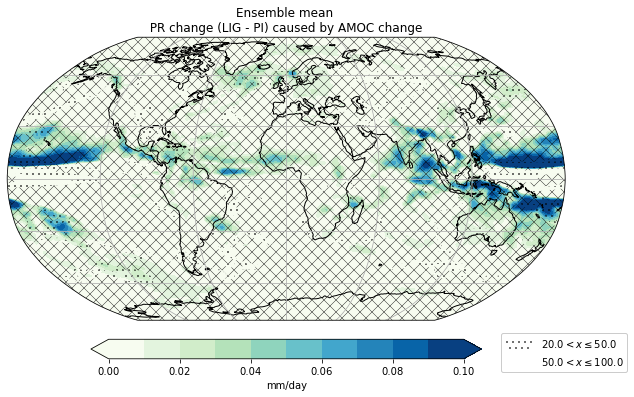

In [29]:
projection = ccrs.Robinson()

transform=ccrs.PlateCarree()
  
bounds_1 = np.arange(0,0.11,0.01)
    
norm_1 = colors.BoundaryNorm(boundaries=bounds_1, ncolors=256)

bounds_2 = [0,20,50,100]
norm_2 = colors.BoundaryNorm(boundaries=bounds_2, ncolors=256)

lat_2 = np.linspace(-90,90,180)
lon_2 = np.linspace(0,360,360)


fig=plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)

ax.coastlines()
ax.gridlines()

ensemble_fig1=ax.contourf(lon_2, lat_2, delta_pr_amoc_ave_1.data , levels=bounds_1,transform=transform, cmap='GnBu', extend='both', norm=norm_1)
cax_2,kw_2 = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)

ensemble_fig2=ax.contourf(lon_2, lat_2, 100 *(delta_pr_amoc_ave_1.data / delta_pr_ave.data), levels=bounds_2, hatches=[ 'xx','xx', '..', None,'xx'], transform=transform, colors='none', extend='both', norm=norm_1)

artists, labels = ensemble_fig2.legend_elements()
ax.legend(artists[2:4], labels[2:4], handleheight=1.5, handlelength=2.8, framealpha=1,loc='lower right', bbox_to_anchor=(1.12, -0.2))
plt.rcParams['hatch.linewidth'] = 0.4

plt.colorbar(ensemble_fig1,cax=cax_2,extend='both',**kw_2, label='mm/day')
ax.set(title='Ensemble mean \n PR change (LIG - PI) caused by AMOC change ' )
